In [1]:
import numpy as np
import overdrivePrototype as OPT   # Add your python class(es)
import librosa as lr
import matplotlib.pyplot as plt
import IPython.display as ipd

### Initialising Overdrive

In [2]:
overdrive = OPT.Overdrive()

overdrive.threshold      = (1/3)    # threshold for symmetrical soft clipping
overdrive.gain       = 6                #dB
overdrive.tone            = 0.5         #Hz
overdrive.level     = 0.5               #dB

### Plotting Static Curve

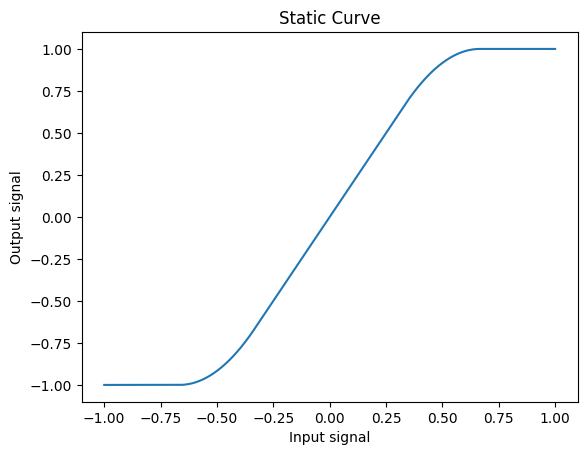

In [3]:
overdrive.plotStaticCurve()

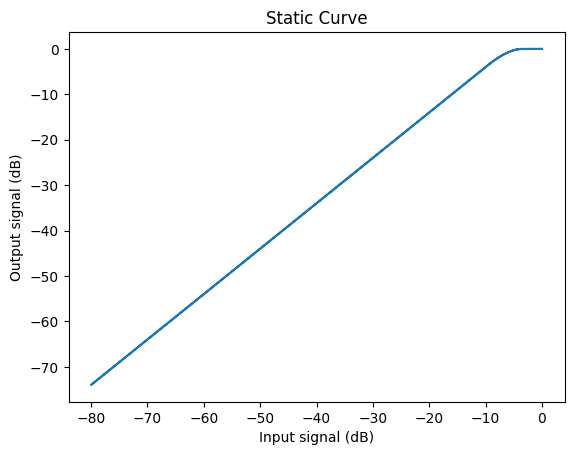

In [4]:
overdrive.plotsecondStaticCurve()

### Loading Audio Files

In [5]:
pathToAudio = "/Users/marina/Documents/Sounds/funkyGuitar1.wav"  # set path to an audio file

sampleRate  = 48000         
sampleAudio, sampleRate = lr.load(pathToAudio, sr = sampleRate, mono = True, duration = 10)

### Applying Overdrive

In [6]:
sampleAudioOverdrive   = overdrive.overdrive_(sampleAudio, sampleRate)

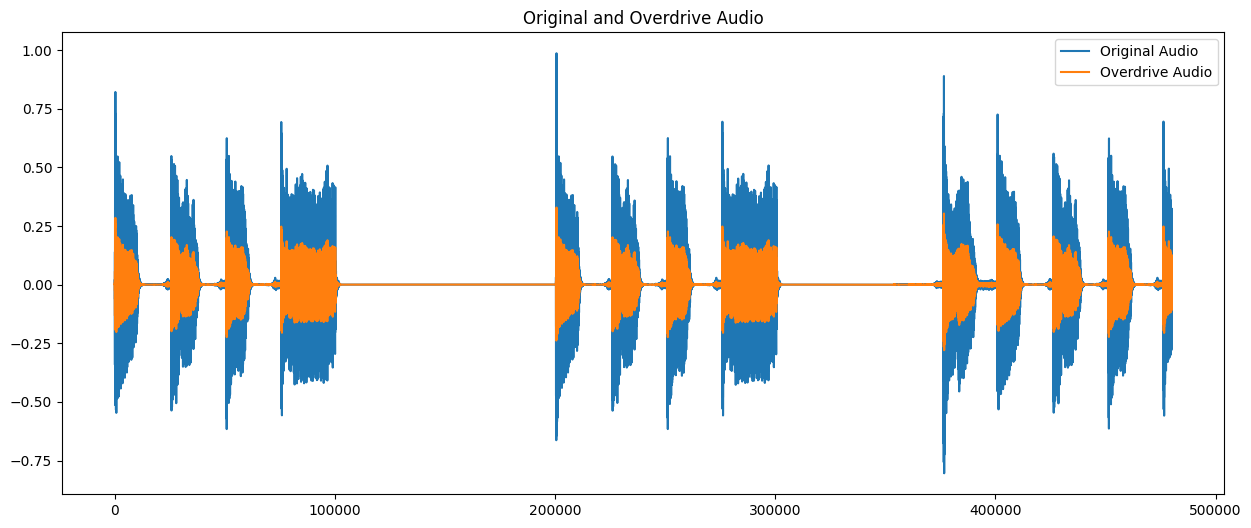

In [8]:
plt.figure(figsize = (15, 6))
plt.title("Original and Overdrive Audio")
plt.plot(sampleAudio, label = "Original Audio")
plt.plot(sampleAudioOverdrive, label = "Overdrive Audio")
plt.legend(loc = "upper right")

*As you can see, the level of the compressed signal may be reduced significantly. Usually, one applies makeup gain to compensate. Maybe a parameter we could add to the pedal ?*

# Original Audio

In [9]:
ipd.Audio(data = sampleAudio, rate = sampleRate)

In [10]:
ipd.Audio(data = sampleAudioOverdrive, rate = sampleRate)